In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go

In [2]:
qsp1=pd.read_csv('BTR QSp1 data.csv')
qsp1.head()

,Nid,Name,Gender,Date of Birth,Fresher/Experience,10th Board,10th Aggregate,10th Year of Pass out,12th Board,12th Course Type,...,Did You Fail and then clear the subject in Master Degree,Have any existing backlogs in Degree?,Have any existing backlogs in Master's Degree?,Have you got year gap in Degree?,Have you got year gap in Master Degree?,Batch,nid_incubation,Payment Print/Display,Payment comments,Post date
0,108714,M S Ramasubramanya,male,11/05/1993,Fresher,SSLC,50.00,2009.0,Diploma,NaN,...,NaN,no,NaN,no,NaN,NaN,NaN,NaN,NaN,01/01/2018
1,108715,Satya prakash sahoo,male,26/06/1991,Fresher,SSLC,72.00,2006.0,PUC/ 12th,Regular,...,no,no,no,no,no,QCDM2,NaN,NaN,NaN,01/01/2018
2,108727,Shabareesh Kumar R,male,09/01/1991,Fresher,SSLC,84.32,2006.0,PUC/ 12th,Regular,...,NaN,no,NaN,no,NaN,"QSSW2,QPEW1",NaN,"11900 - 07-01-2018, 2300 - 11-02-2018",(201802QSP0098) Shabareesh Kumar R with ID:108...,02/01/2018
3,108729,Monima Gogoi,female,21/01/1986,Fresher,SSLC,80.00,2002.0,PUC/ 12th,Regular,...,no,no,no,no,no,"QCSA2,QSCW1",NaN,11900 - 20-01-2018,(201801QSP0379) Monima Gogoi with ID:108729 ha...,02/01/2018
4,108733,Mohit Singh Chauhan,male,30/07/1995,Fresher,SSLC,84.00,2011.0,PUC/ 12th,Regular,...,NaN,no,NaN,no,NaN,"QTGW1,QCCE2",NaN,"22950 - 09-01-2018, Target for Apti is 0/-",(201801QSP0264) Mohit Singh Chauhan with ID:10...,02/01/2018


In [3]:
qsp1.shape

(3999, 83)

In [4]:
qsp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 83 columns):
Nid                                                         3999 non-null int64
Name                                                        3999 non-null object
Gender                                                      3999 non-null object
Date of Birth                                               3999 non-null object
Fresher/Experience                                          3999 non-null object
10th Board                                                  3662 non-null object
10th Aggregate                                              3633 non-null float64
10th Year of Pass out                                       3640 non-null float64
12th Board                                                  3633 non-null object
12th Course Type                                            3363 non-null object
12th/Diploma/ITI Year of Pass out                           3633 non-null float64


In [5]:
dict(round(100*qsp1.isnull().sum()/len(qsp1),2))

{'Nid': 0.0,
 'Name': 0.0,
 'Gender': 0.0,
 'Date of Birth': 0.0,
 'Fresher/Experience': 0.0,
 '10th Board': 8.43,
 '10th Aggregate': 9.15,
 '10th Year of Pass out': 8.98,
 '12th Board': 9.15,
 '12th Course Type': 15.9,
 '12th/Diploma/ITI Year of Pass out': 9.15,
 '12th/Diploma/ITI-Aggregate': 9.25,
 'Diploma Course Type': 90.1,
 'Diploma College': 90.15,
 'Other(Diploma College)': 91.1,
 'Diploma Stream': 90.12,
 'Other(Diploma Stream)': 99.8,
 'Diploma University': 93.1,
 'Other(Diploma University)': 93.62,
 'Degree': 9.03,
 'Degree Course Type': 9.2,
 'Degree Year of Pass out': 9.03,
 'Degree College Name': 9.2,
 'Other(Degree College)': 62.99,
 'Degree University': 9.2,
 'Degree University Registration No': 9.25,
 'Degree Aggregate': 9.35,
 'Stream in Degree': 9.03,
 'Other(Degree Stream)': 98.77,
 "Have you done your Master's Degree?": 9.2,
 "Master's Degree": 90.32,
 "Master's Degree Course Type": 90.1,
 "Other(Master's degree)": 99.97,
 "Master's Degree Year of Pass out": 90.45,

In [6]:
li3=list(qsp1.columns[round(100*qsp1.isnull().sum()/len(qsp1),2)>=98])
li3

['Other(Diploma Stream)',
 'Other(Degree Stream)',
 "Other(Master's degree)",
 'Certifications',
 'Other(certifications)',
 'Other(Highest Degree)',
 'Other(Degree)',
 'Other(preferred location)',
 'nid_incubation']

In [7]:
qsp1.drop(li3,axis=1,inplace=True)

In [8]:
li1=list(qsp1.columns[round(100*qsp1.isnull().sum()/len(qsp1),2)>0])

In [9]:
for i1 in li1:
    if qsp1[i1].dtypes=='float64':
        print(i1)

10th Aggregate
10th Year of Pass out
12th/Diploma/ITI Year of Pass out
12th/Diploma/ITI-Aggregate
Degree Year of Pass out
Degree Aggregate
Master's Degree Year of Pass out
Master Degree Aggregate
How Many Months of Gap You Have?
Target_fees


In [10]:
for i2 in li1:
    if qsp1[i2].dtypes=='object':
        qsp1[i2].fillna(value='Data Not Found',inplace=True)

In [11]:
li2=list(qsp1.columns[round(100*qsp1.isnull().sum()/len(qsp1),2)>0])

In [12]:
for i3 in li2:
    qsp1[i3].fillna(value=0,inplace=True)

In [13]:
qsp1.columns

Index(['Nid', 'Name', 'Gender', 'Date of Birth', 'Fresher/Experience',
       '10th Board', '10th Aggregate', '10th Year of Pass out', '12th Board',
       '12th Course Type', '12th/Diploma/ITI Year of Pass out',
       '12th/Diploma/ITI-Aggregate', 'Diploma Course Type', 'Diploma College',
       'Other(Diploma College)', 'Diploma Stream', 'Diploma University',
       'Other(Diploma University)', 'Degree', 'Degree Course Type',
       'Degree Year of Pass out', 'Degree College Name',
       'Other(Degree College)', 'Degree University',
       'Degree University Registration No', 'Degree Aggregate',
       'Stream in Degree', 'Have you done your Master's Degree?',
       'Master's Degree', 'Master's Degree Course Type',
       'Master's Degree Year of Pass out', 'Master Degree Aggregate',
       'Master Degree College Name', 'Other(Master's College)',
       'Master's Degree Stream', 'Other(Master's Stream)',
       'Master's Degree University',
       'Master's Degree University Regis

In [14]:
col=['Nid','Name','Date of Birth','Photo','UID','Degree University Registration No','Branch Enquired','Native']

In [15]:
qsp1.drop(col,axis=1,inplace=True)

In [16]:
qsp1.shape

(3999, 66)

In [17]:
qsp1['Notice Period'].value_counts()

Immediate         3786
1                   81
2                   76
3                   53
Data Not Found       2
4                    1
Name: Notice Period, dtype: int64

In [18]:
mas=dict(qsp1['Master\'s Degree'].value_counts())

In [19]:
li=list(mas.keys())
li.remove('Data Not Found')
print(li)
qsp1['Higest_education']=qsp1['Master\'s Degree'].apply(lambda x: "Masters" if x in li else 'Degree')

['MCA', 'M.Tech', 'MSC', 'MBA', 'M.S.', 'Other', 'M Com', 'M.E']


In [20]:
li4=list(qsp1['City'].unique())
li5=[]
for i5 in li4:
    if i5.lower().strip().split('-')[0]=='bangalore':
        li5.append(i5)
len(li5)

83

In [21]:
qsp1['City'].replace(to_replace=li5,value='Bangalore',inplace=True)
qsp1['City'].replace(to_replace=['Banglore','Bangalore ','Bangalore 560098','Bangalore`','Bangalore 560010','Bangalore   560079','Bangalore 560076','Bangalore 560097','BASAVANAGUDI 560004','Bangalore 560073','Banglaore','BANGALORE -560097','Bangalore 562123','BANGALORE..','Bangalore  560072','Bangalore 560085','Bangalore  -560054','Bangalore 560022',' Bangalore  560058','Bangalore 580086','Bangalore 560020','BANGLORE','BANGALORE - 560098','Bangalore , 560079','Bangalroe560040','Bangalore 560058','Bangalore 560094'],value='Bangalore',inplace=True)
dict(qsp1['City'].value_counts())

{'Bangalore': 1886,
 'Mysore': 58,
 'Mandya': 41,
 'Ballari': 38,
 'Hassan': 35,
 'Anantapur': 28,
 'Tumkur': 23,
 'Mangalore': 23,
 'Gulbarga': 22,
 'Shivamogga': 17,
 'Kolar': 16,
 'Davangere': 16,
 'Belagavi': 16,
 'MANDYA-571401': 16,
 'Chitradurga': 15,
 'MANDYA': 14,
 'Raichur': 14,
 'Dharwad': 14,
 'Shimoga': 13,
 'Karwar': 13,
 'Chittoor': 13,
 'Shivamoga': 11,
 'Nellore': 11,
 'Hosur': 11,
 'Bidar': 10,
 'Kurnool': 10,
 'mysore': 9,
 'MYSORE': 9,
 'Hindupur': 8,
 'Patna': 8,
 'HASSAN': 8,
 'Udupi': 8,
 'Vijayapur': 8,
 'TUMKUR': 8,
 'BALLARI-583104': 8,
 'Belgaum': 7,
 'Davanagere': 7,
 'RANCHI': 6,
 'BHUBANESWAR': 6,
 'Channapatna': 6,
 'Kannur': 6,
 'KOLAR-563101': 6,
 'BIDAR': 6,
 'Vellore': 6,
 'Bhubaneswar': 6,
 'KOLKATA': 6,
 'Erode': 6,
 'Ramanagara': 5,
 'Haveri': 5,
 'Ramanagar': 5,
 'HUBLI': 5,
 'DAVANAGERE': 5,
 'Puttur': 5,
 'ONGOLE': 5,
 'Gadag': 5,
 'Gokak': 5,
 'UDUPI': 5,
 'Bangarpet': 5,
 'Muzaffarpur': 5,
 'ANANTHPUR': 5,
 'Hubli': 5,
 'Indore': 5,
 'Vijayapu

In [22]:
qsp1['City']=qsp1['City'].apply(lambda row:'Local' if row=='Bangalore' else 'Not Local')
qsp1['State']=qsp1['State'].apply(lambda row:'Local' if row=='Karnataka' else 'Not Local')

In [23]:
qsp1.columns

Index(['Gender', 'Fresher/Experience', '10th Board', '10th Aggregate',
       '10th Year of Pass out', '12th Board', '12th Course Type',
       '12th/Diploma/ITI Year of Pass out', '12th/Diploma/ITI-Aggregate',
       'Diploma Course Type', 'Diploma College', 'Other(Diploma College)',
       'Diploma Stream', 'Diploma University', 'Other(Diploma University)',
       'Degree', 'Degree Course Type', 'Degree Year of Pass out',
       'Degree College Name', 'Other(Degree College)', 'Degree University',
       'Degree Aggregate', 'Stream in Degree',
       'Have you done your Master's Degree?', 'Master's Degree',
       'Master's Degree Course Type', 'Master's Degree Year of Pass out',
       'Master Degree Aggregate', 'Master Degree College Name',
       'Other(Master's College)', 'Master's Degree Stream',
       'Other(Master's Stream)', 'Master's Degree University',
       'Master's Degree University Registration No', 'Course(s)',
       'Do You Have Pan Card?', 'Do You Have Passport?', 

In [24]:
qsp1['City'].value_counts()

Not Local    2113
Local        1886
Name: City, dtype: int64

In [25]:
qsp1.groupby('Degree Year of Pass out').count()

,Gender,Fresher/Experience,10th Board,10th Aggregate,10th Year of Pass out,12th Board,12th Course Type,12th/Diploma/ITI Year of Pass out,12th/Diploma/ITI-Aggregate,Diploma Course Type,...,Did You Fail and then clear the subject in Master Degree,Have any existing backlogs in Degree?,Have any existing backlogs in Master's Degree?,Have you got year gap in Degree?,Have you got year gap in Master Degree?,Batch,Payment Print/Display,Payment comments,Post date,Higest_education
Degree Year of Pass out,,,,,,,,,,,,,,,,,,,,,
0.0,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361
1998.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1999.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2000.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2001.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2002.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2003.0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2004.0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2005.0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [26]:
def yop(a):
    if a<2017.0:
        return 'YOP below 2017'
    elif a==2017.0:
        return 'YOP in 2017'
    elif a==2018.0:
        return 'YOP in 2018'
    else:
        return 'YOP above 2018'
qsp1['YOP_catagory']=qsp1['Degree Year of Pass out'].apply(lambda x:yop(x))

In [27]:
qsp1['Master\'s Degree Year of Pass out'].value_counts()

0.0       3617
2018.0     108
2017.0      77
2016.0      51
2015.0      37
2014.0      32
2011.0      18
2013.0      17
2012.0      12
2010.0      10
2019.0       9
2008.0       3
2009.0       2
1999.0       2
2003.0       1
2004.0       1
2020.0       1
2005.0       1
Name: Master's Degree Year of Pass out, dtype: int64

In [28]:
data1=dict(qsp1.groupby(['How Many Months of Gap You Have?','Looking For a Job Change']).count()['Gender'])

In [29]:
q1=[]
q2=[]
for k in list(data1.keys())[1:]:
    q1.append(k[0])
    q2.append(k[1])

In [30]:
da2=list(data1.values())[1:]

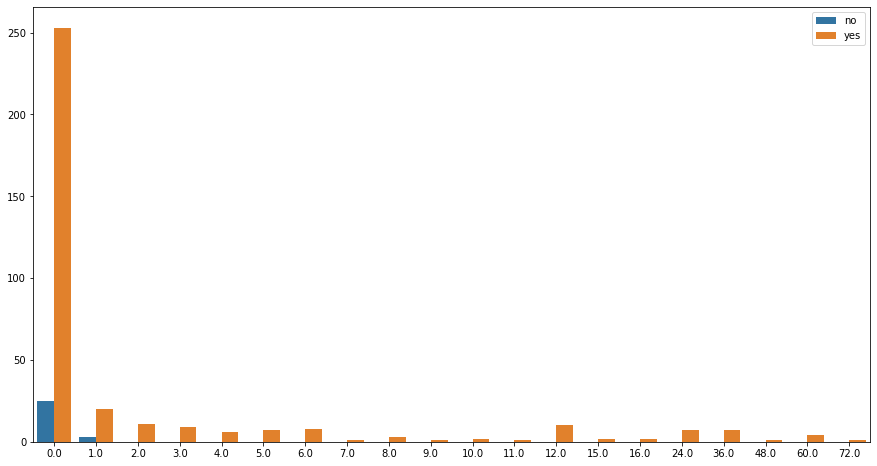

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(y=da2,x=q1,hue=q2)

In [32]:
qsp1['per_fees']=round(qsp1['Balance_Fees']/qsp1['Target_fees']*100,2)

In [33]:
def per(a):
    if a<=0:
        return 'No balance'
    elif a<=70:
        return 'Less than 70%'
    else:
        return 'More than 70%'
qsp1['Fees_cat']=qsp1['per_fees'].apply(lambda x:per(x))
fee=dict(qsp1['Fees_cat'].value_counts())
fee2={'Catagory':list(fee.keys()),'count':list(fee.values())}
Fees=pd.DataFrame(data=fee2)

In [34]:
Fees

,Catagory,count
0,No balance,2710
1,More than 70%,924
2,Less than 70%,365


In [35]:
import plotly.graph_objects as go
labels = list(fee.keys())
values = list(fee.values())

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,text=list(fee.keys()))])
fig.show()

Text(0.5, 1.0, 'Balance fee category w.r.t YOP')

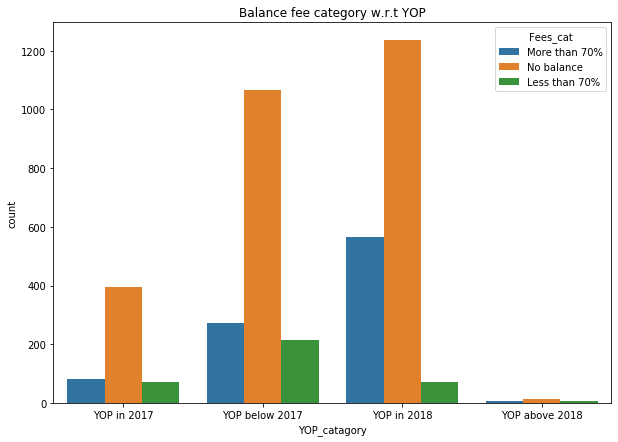

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(x=qsp1['YOP_catagory'],hue=qsp1['Fees_cat'])
plt.title('Balance fee category w.r.t YOP')

In [37]:
qsp1.groupby(['YOP_catagory','Fees_cat']).count()

Gender  Fresher/Experience  10th Board  \
YOP_catagory   Fees_cat                                                
YOP above 2018 Less than 70%       7                   7           7   
               More than 70%       7                   7           7   
               No balance         14                  14          14   
YOP below 2017 Less than 70%     214                 214         214   
               More than 70%     271                 271         271   
               No balance       1065                1065        1065   
YOP in 2017    Less than 70%      72                  72          72   
               More than 70%      80                  80          80   
               No balance        396                 396         396   
YOP in 2018    Less than 70%      72                  72          72   
               More than 70%     566                 566         566   
               No balance       1235                1235        1235   

                              10th Aggregate  10th Year of Pass out  \
YOP_catagory   Fees_cat                                               
YOP above 2018 Less than 70%               7                      7   
               More than 70%               7                      7   
               No balance                 14                     14   
YOP below 2017 Less than 70%             214                    214   
               More than 70%             271                    271   
               No balance               1065                   1065   
YOP in 2017    Less than 70%              72                     72   
               More than 70%              80                     80   
               No balance                396                    396   
YOP in 2018    Less than 70%              72                     72   
               More than 70%             566                    566   
               No balance               1235                   1235   

                              12th Board  12th Course Type  \
YOP_catagory   Fees_cat                                      
YOP above 2018 Less than 70%           7                 7   
               More than 70%           7                 7   
               No balance             14                14   
YOP below 2017 Less than 70%         214               214   
               More than 70%         271               271   
               No balance           1065              1065   
YOP in 2017    Less than 70%          72                72   
               More than 70%          80                80   
               No balance            396               396   
YOP in 2018    Less than 70%          72                72   
               More than 70%         566               566   
               No balance           1235              1235   

                              12th/Diploma/ITI Year of Pass out  \
YOP_catagory   Fees_cat                                           
YOP above 2018 Less than 70%                                  7   
               More than 70%                                  7   
               No balance                                    14   
YOP below 2017 Less than 70%                                214   
               More than 70%                                271   
               No balance                                  1065   
YOP in 2017    Less than 70%                                 72   
               More than 70%                                 80   
               No balance                                   396   
YOP in 2018    Less than 70%                                 72   
               More than 70%                                566   
               No balance                                  1235   

                              12th/Diploma/ITI-Aggregate  Diploma Course Type  \
YOP_catagory   Fees_cat                                                         
YOP above 2018 Less than 70%                           7

Text(0.5, 1.0, 'Balance count w.r.t Highest Education')

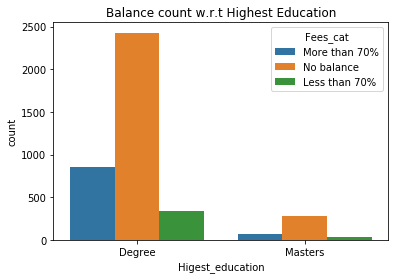

In [38]:
sns.countplot(data=qsp1,x='Higest_education',hue='Fees_cat')
plt.title('Balance count w.r.t Highest Education')

Text(0.5, 1.0, 'Balance w.r.t to Degree Stream')

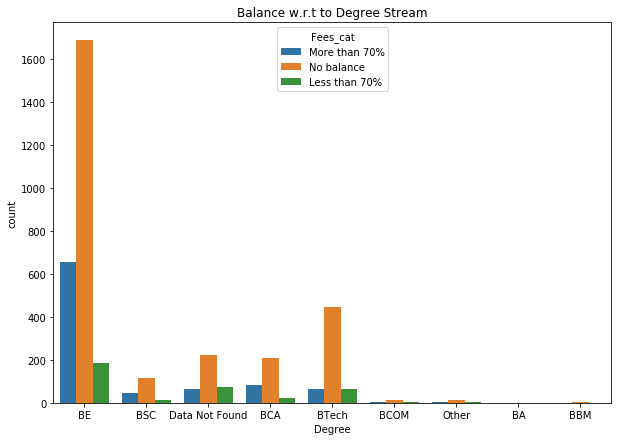

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x=qsp1['Degree'],hue=qsp1['Fees_cat'])
plt.title('Balance w.r.t to Degree Stream')

In [40]:
qsp1.groupby(['Degree','Fees_cat']).count()

Gender  Fresher/Experience  10th Board  \
Degree         Fees_cat                                                
BA             Less than 70%       1                   1           1   
               No balance          1                   1           1   
BBM            Less than 70%       1                   1           1   
               More than 70%       1                   1           1   
               No balance          2                   2           2   
BCA            Less than 70%      21                  21          21   
               More than 70%      81                  81          81   
               No balance        210                 210         210   
BCOM           Less than 70%       3                   3           3   
               More than 70%       5                   5           5   
               No balance         13                  13          13   
BE             Less than 70%     183                 183         183   
               More than 70%     657                 657         657   
               No balance       1687                1687        1687   
BSC            Less than 70%      15                  15          15   
               More than 70%      47                  47          47   
               No balance        117                 117         117   
BTech          Less than 70%      64                  64          64   
               More than 70%      66                  66          66   
               No balance        447                 447         447   
Data Not Found Less than 70%      75                  75          75   
               More than 70%      65                  65          65   
               No balance        221                 221         221   
Other          Less than 70%       2                   2           2   
               More than 70%       2                   2           2   
               No balance         12                  12          12   

                              10th Aggregate  10th Year of Pass out  \
Degree         Fees_cat                                               
BA             Less than 70%               1                      1   
               No balance                  1                      1   
BBM            Less than 70%               1                      1   
               More than 70%               1                      1   
               No balance                  2                      2   
BCA            Less than 70%              21                     21   
               More than 70%              81                     81   
               No balance                210                    210   
BCOM           Less than 70%               3                      3   
               More than 70%               5                      5   
               No balance                 13                     13   
BE             Less than 70%             183                    183   
               More than 70%             657                    657   
               No balance               1687                   1687   
BSC            Less than 70%              15                     15   
               More than 70%              47                     47   
               No balance                117                    117   
BTech          Less than 70%              64                     64   
               More than 70%              66                     66   
               No balance                447                    447   
Data Not Found Less than 70%              75                     75   
               More than 70%              65                     65   
               No balance                221                    221   
Other          Less than 70%               2                      2   
               More than 70%               2                      2   
               No balance                 12                     12   

                        

In [41]:
qsp1.groupby(['Higest_education','Fees_cat']).count()

Gender  Fresher/Experience  10th Board  \
Higest_education Fees_cat                                                
Degree           Less than 70%     333                 333         333   
                 More than 70%     852                 852         852   
                 No balance       2427                2427        2427   
Masters          Less than 70%      32                  32          32   
                 More than 70%      72                  72          72   
                 No balance        283                 283         283   

                                10th Aggregate  10th Year of Pass out  \
Higest_education Fees_cat                                               
Degree           Less than 70%             333                    333   
                 More than 70%             852                    852   
                 No balance               2427                   2427   
Masters          Less than 70%              32                     32   
                 More than 70%              72                     72   
                 No balance                283                    283   

                                12th Board  12th Course Type  \
Higest_education Fees_cat                                      
Degree           Less than 70%         333               333   
                 More than 70%         852               852   
                 No balance           2427              2427   
Masters          Less than 70%          32                32   
                 More than 70%          72                72   
                 No balance            283               283   

                                12th/Diploma/ITI Year of Pass out  \
Higest_education Fees_cat                                           
Degree           Less than 70%                                333   
                 More than 70%                                852   
                 No balance                                  2427   
Masters          Less than 70%                                 32   
                 More than 70%                                 72   
                 No balance                                   283   

                                12th/Diploma/ITI-Aggregate  \
Higest_education Fees_cat                                    
Degree           Less than 70%                         333   
                 More than 70%                         852   
                 No balance                           2427   
Masters          Less than 70%                          32   
                 More than 70%                          72   
                 No balance                            283   

                                Diploma Course Type  ...  \
Higest_education Fees_cat                            ...   
Degree           Less than 70%                  333  ...   
                 More than 70%                  852  ...   
                 No balance                    2427  ...   
Masters          Less than 70%                   32  ...   
                 More than 70%                   72  ...   
                 No balance                     283  ...   

                                Have any existing backlogs in Degree?  \
Higest_education Fees_cat                                               
Degree           Less than 70%                                    333   
                 More than 70%                                    852   
                 No balance                                      2427   
Masters          Less than 70%                                     32   
                 More than 70%                                     72   
                 No balance                                       283   

                                Have any existing backlogs in Master's Degree?  \
Higest_education Fees_cat                                                        
Degree           Less than 70%                               

In [42]:
for c in qsp1.columns:
    print(len(set(qsp1[c])),'\t',c)

2 	 Gender
3 	 Fresher/Experience
5 	 10th Board
697 	 10th Aggregate
24 	 10th Year of Pass out
3 	 12th Board
2 	 12th Course Type
23 	 12th/Diploma/ITI Year of Pass out
832 	 12th/Diploma/ITI-Aggregate
3 	 Diploma Course Type
23 	 Diploma College
270 	 Other(Diploma College)
10 	 Diploma Stream
8 	 Diploma University
166 	 Other(Diploma University)
9 	 Degree
3 	 Degree Course Type
24 	 Degree Year of Pass out
424 	 Degree College Name
1180 	 Other(Degree College)
41 	 Degree University
961 	 Degree Aggregate
28 	 Stream in Degree
3 	 Have you done your Master's Degree?
9 	 Master's Degree
3 	 Master's Degree Course Type
18 	 Master's Degree Year of Pass out
129 	 Master Degree Aggregate
10 	 Master Degree College Name
277 	 Other(Master's College)
12 	 Master's Degree Stream
35 	 Other(Master's Stream)
15 	 Master's Degree University
210 	 Master's Degree University Registration No
356 	 Course(s)
3 	 Do You Have Pan Card?
3 	 Do You Have Passport?
2 	 Ready to Relocate
3 	 Already

In [43]:
# for co2 in qsp1.columns:
#     if len(set(qsp1[co2]))<20:
#         print(co2)

In [44]:
qsp1.columns

Index(['Gender', 'Fresher/Experience', '10th Board', '10th Aggregate',
       '10th Year of Pass out', '12th Board', '12th Course Type',
       '12th/Diploma/ITI Year of Pass out', '12th/Diploma/ITI-Aggregate',
       'Diploma Course Type', 'Diploma College', 'Other(Diploma College)',
       'Diploma Stream', 'Diploma University', 'Other(Diploma University)',
       'Degree', 'Degree Course Type', 'Degree Year of Pass out',
       'Degree College Name', 'Other(Degree College)', 'Degree University',
       'Degree Aggregate', 'Stream in Degree',
       'Have you done your Master's Degree?', 'Master's Degree',
       'Master's Degree Course Type', 'Master's Degree Year of Pass out',
       'Master Degree Aggregate', 'Master Degree College Name',
       'Other(Master's College)', 'Master's Degree Stream',
       'Other(Master's Stream)', 'Master's Degree University',
       'Master's Degree University Registration No', 'Course(s)',
       'Do You Have Pan Card?', 'Do You Have Passport?', 

In [45]:
qsp1['per_fees'].value_counts()

0.00      2686
100.00     896
31.93       60
45.72       39
7.10        18
          ... 
37.14        1
44.20        1
9.39         1
25.39        1
51.57        1
Name: per_fees, Length: 164, dtype: int64

In [46]:
lis=['10th Board','12th Board','Diploma College','Other(Diploma College)','Diploma University','Other(Diploma University)','Degree College Name','Other(Degree College)','Degree University','Master Degree College Name',"Other(Master's College)","Master's Degree University","Master's Degree University Registration No",'per_fees','Payment comments','Payment Print/Display','Other(Degree University)',"Other(Master's University)",'Post date']

In [47]:
qsp1.drop(lis,axis=1,inplace=True)

In [48]:
def per(a):
    if a=='No balance':
        return 0
    elif a=='Less than 70%':
        return 1
    else:
        return 2
qsp1['Fees_cat']=qsp1['Fees_cat'].apply(lambda x:per(x))
fee=dict(qsp1['Fees_cat'].value_counts())
fee1={'Catagory':list(fee.keys()),'count':list(fee.values())}
Fees1=pd.DataFrame(data=fee1)

## Label Encoding

In [49]:
qsp1.shape

(3999, 51)

In [50]:
lis1=[]
for co2 in qsp1.columns:
    if len(set(qsp1[co2]))<20:
        lis1.append(co2)

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
for co3 in lis1:
    qsp1[co3]=le.fit_transform(qsp1[co3])

In [53]:
lis2=list(qsp1.columns[qsp1.dtypes=='object'])

In [54]:
for co4 in lis2:
    qsp1[co4]=le.fit_transform(qsp1[co4])

## Splitting the model

In [55]:
x=qsp1.drop(['Fees_cat','Balance_Fees'],1)
y=qsp1['Fees_cat']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [57]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
lgr=LogisticRegression()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
bnb=BernoulliNB()
knn=KNeighborsClassifier()
fit=[rfc,dtc,lgr,ada,gbc,xgb,bnb,knn]

In [58]:
for fi in fit:
    print(fi.fit(x_train,y_train))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interce

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
pred={rfc:'rfc_pred',dtc:'dtc_pred',lgr:'lgr_pred',ada:'ada_pred',gbc:'gbc_pred',xgb:'xgb_pred',bnb:'bnb_pred',knn:'knn_pred'}
prob={rfc:'rfc_pred_prob',dtc:'dtc_pred_prob',lgr:'lgr_pred_prob',ada:'ada_pred_prob',gbc:'gbc_pred_prob',xgb:'xgb_pred_prob',bnb:'bnb_pred_prob',knn:'knn_pred_prob'}
acc=[]
pre=[]
rec=[]
fsc=[]
auc=[]
index=[]
for k,v in pred.items():   
    v=k.predict(x_test)
    print(str(k).split('(')[0])
    print()
    print(accuracy_score(y_test,v))
    print()
    print(confusion_matrix(y_test,v))
    print()
    print(classification_report(y_test,v))
    index.append(str(k).split('(')[0])
    acc.append(100*round(accuracy_score(y_test,v),2))
    pre.append(100*round(metrics.precision_score(y_test,v,average='macro'),2))
    rec.append(100*round(metrics.recall_score(y_test,v,average='macro'),2))
    fsc.append(100*round(metrics.f1_score(y_test,v,average='macro'),2))
    
# for k1,v1 in prob.items():
#     v1=k1.predict_proba(x_test)[::,1]
#     auc.append(100*round(metrics.roc_auc_score(y_test,v1),3))

RandomForestClassifier

0.8433333333333334

[[760   7  25]
 [ 77  26  12]
 [ 61   6 226]]

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       792
           1       0.67      0.23      0.34       115
           2       0.86      0.77      0.81       293

    accuracy                           0.84      1200
   macro avg       0.79      0.65      0.68      1200
weighted avg       0.83      0.84      0.82      1200

DecisionTreeClassifier

0.8458333333333333

[[727  32  33]
 [ 39  55  21]
 [ 43  17 233]]

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       792
           1       0.53      0.48      0.50       115
           2       0.81      0.80      0.80       293

    accuracy                           0.85      1200
   macro avg       0.75      0.73      0.74      1200
weighted avg       0.84      0.85      0.84      1200

LogisticRegression

0.7291666666666666

[[764   4  24]
 

In [60]:
acc_data=pd.DataFrame(columns=index,data=[acc,pre,rec,fsc],index=['Accurecy_Score','Precesion','Recall','f1_score'])
acc_data.transpose()

,Accurecy_Score,Precesion,Recall,f1_score
RandomForestClassifier,84.0,79.0,65.0,68.0
DecisionTreeClassifier,85.0,75.0,73.0,74.0
LogisticRegression,73.0,57.0,45.0,45.0
AdaBoostClassifier,84.0,80.0,64.0,67.0
GradientBoostingClassifier,87.0,80.0,70.0,73.0
XGBClassifier,87.0,83.0,68.0,72.0
BernoulliNB,61.0,29.0,37.0,32.0
KNeighborsClassifier,85.0,75.0,71.0,73.0


In [61]:
qsp1['Fees_cat'].value_counts()

0    2710
2     924
1     365
Name: Fees_cat, dtype: int64

In [62]:
cc={}
for c in qsp1.columns:
    cc.setdefault(c,len(set(qsp1[c])))

In [63]:
list(cc.keys())

['Gender',
 'Fresher/Experience',
 '10th Aggregate',
 '10th Year of Pass out',
 '12th Course Type',
 '12th/Diploma/ITI Year of Pass out',
 '12th/Diploma/ITI-Aggregate',
 'Diploma Course Type',
 'Diploma Stream',
 'Degree',
 'Degree Course Type',
 'Degree Year of Pass out',
 'Degree Aggregate',
 'Stream in Degree',
 "Have you done your Master's Degree?",
 "Master's Degree",
 "Master's Degree Course Type",
 "Master's Degree Year of Pass out",
 'Master Degree Aggregate',
 "Master's Degree Stream",
 "Other(Master's Stream)",
 'Course(s)',
 'Do You Have Pan Card?',
 'Do You Have Passport?',
 'Ready to Relocate',
 'Already Resigned',
 'Currently Are You Working',
 'Do You Have Past Work Experience?',
 'Highest Degree',
 'How Many Months of Gap You Have?',
 'Looking For a Job Change',
 'Notice Period',
 'Current/ Previous Company Name',
 'Current/ Previous CTC',
 'Current/ Previous Job Profiles',
 'Balance_Fees',
 'Target_fees',
 'Preferred Location',
 'Do You Have Aadhar Card?',
 'State',
 '

In [64]:
qsp1['Fees_cat'].value_counts()

0    2710
2     924
1     365
Name: Fees_cat, dtype: int64

In [65]:
# qsp[].value_counts()

In [66]:
yop=dict(qsp1['YOP_catagory'].value_counts())
yop1={'YOP':list(yop.keys()),'Counts':list(yop.values())}
YOP=pd.DataFrame(data=yop1)

In [67]:
import plotly.graph_objects as go
labels = list(yop.keys())
values = list(yop.values())

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,text=list(yop.keys()))])
fig.show()

In [68]:
YOP

,YOP,Counts
0,3,1873
1,1,1550
2,2,548
3,0,28


In [69]:
yop_bal=dict(qsp1.groupby('YOP_catagory').sum()['Balance_Fees'])

In [70]:
# plt.figure(figsize=(10,7))
# for fit1 in fit:
#     y_pred_pro=fit1.predict_proba(x_test)[::,1]
#     fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_pro)
#     auc=100*round(metrics.roc_auc_score(y_test,y_pred_pro),2)
#     plt.plot([0,1],[0,1],'r--')
#     plt.plot(fpr,tpr,label=(str(fit1).split('(')[0])+' auc= '+str(auc))
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend()

In [71]:
# sns.scatterplot(x=list(qsp1['']),y=list(y_test))

In [72]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [73]:
xg_pred=xgb.predict(x_test)

In [74]:
accuracy_score(y_test,xg_pred)

0.8658333333333333

In [75]:
con=confusion_matrix(y_test,xg_pred)
col=[0,1,2]
ind=[0,1,2]
confuse=pd.DataFrame(data=con)
print(con)
confuse

[[768   8  16]
 [ 69  30  16]
 [ 49   3 241]]


,0,1,2
0,768,8,16
1,69,30,16
2,49,3,241


In [76]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       792
           1       0.73      0.26      0.38       115
           2       0.88      0.82      0.85       293

    accuracy                           0.87      1200
   macro avg       0.83      0.68      0.72      1200
weighted avg       0.86      0.87      0.85      1200



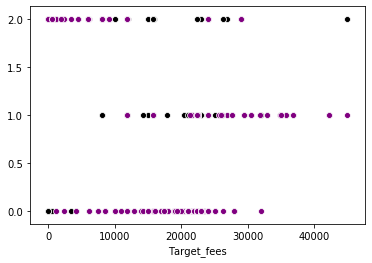

In [77]:
sns.scatterplot(x=x_test['Target_fees'],y=list(y_test),color='black')
sns.scatterplot(x=x_test['Target_fees'],y=list(xg_pred),color='purple')

In [78]:
x_test.shape

(1200, 49)

In [79]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=list(y_test), x=x_test['Target_fees'],
                    mode='markers',
                    name='Test Data'))
fig.add_trace(go.Scatter(y=list(xg_pred), x=x_test['Target_fees'],
                    mode='markers',
                    name='Predicted data'))


# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='lines',
#                     name='lines'))

fig.show()


In [80]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=list(y_test), x=x_test.index,
                    mode='markers',
                    name='Test Data'))
fig.add_trace(go.Scatter(y=list(xg_pred), x=x_test.index,
                    mode='markers',
                    name='Predicted data'))

In [81]:
, "people", "backgroun"corr=dict(qsp1.corr()['Fees_cat'])
lis=list(x.columns)
corr2={}
for a,b in corr.items():
    if a in lis:
        corr2.setdefault(a,b) 
corr2.pop('Batch')
corr3={'Columns':list(corr2.keys()),'Correlation':list(corr2.values())}
correlation=pd.DataFrame(data=corr3)

SyntaxError: invalid syntax (<ipython-input-81-21487fdae269>, line 1)

In [ ]:
correlation.iplot(x='Columns',y='Correlation',kind='bar',xTitle='Column Names',yTitle='Correlation',title='Correlation with Fees catagory',)

In [ ]:
sns.distplot(qsp1['Balance_Fees'])
plt.title('Distribution of Balance Fees in Dataset')
plt.show()

In [ ]:
confuse

In [ ]:
# import chart_studio.plotly as py
# from plotly.graph_objs import *


# trace1 = {
#     "type": "heatmap", 
#     "x": ["No Balance", "Less than 70%", "More than 70%"], 
#     "y": ["No Balance", "Less than 70%", "More than 70%", "people", "backgroun"], 
#     "z": [[30,16,9], [3,241,49], [8,16,768]]
#   }
# data = Data([trace1])
# layout = {
#     "title": "Confusion Matrix", 
#     "xaxis": {"title": "Predicted value"}, 
#     "yaxis": {"title": "Real value"}, 
#     "annotations": [
#       {
#         "x": "No Balance", 
#         "y": "No Balance", 
#         "font": {"color": "white"}, 
#         "text": "30", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "Less than 70%", 
#         "y": "No Balance", 
#         "font": {"color": "white"}, 
#         "text": "16", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "More than 70%", 
#         "y": "No Balance", 
#         "font": {"color": "white"}, 
#         "text": "9", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "No Balance", 
#         "y": "Less than 70%", 
#         "font": {"color": "white"}, 
#         "text": "3", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "Less than 70%", 
#         "y": "Less than 70%", 
#         "font": {"color": "white"}, 
#         "text": "241", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "More than 70%", 
#         "y": "Less than 70%", 
#         "font": {"color": "white"}, 
#         "text": "49", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "No Balance", 
#         "y": "More than 70%", 
#         "font": {"color": "white"}, 
#         "text": "8", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "Less than 70%", 
#         "y": "More than 70%", 
#         "font": {"color": "white"}, 
#         "text": "16", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }, 
#       {
#         "x": "More than 70%", 
#         "y": "More than 70%", 
#         "font": {"color": "white"}, 
#         "text": "768", 
#         "xref": "x1", 
#         "yref": "y1", 
#         "showarrow": False
#       }
#     ]
#   }
# fig = Figure(data=data, layout=layout)
# py.plot(fig)